In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = [15,10]

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df.drop(['area_type', 'availability', 'society','balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df2.fillna({'balcony':'0'}, inplace = True)

In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head(10)

<ipython-input-9-2c0e1a008b94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [10]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except Exception:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [15]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except Exception:
        return None

In [16]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [17]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [18]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [19]:
df5.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [20]:
len(df5['location'].unique())

1304

In [21]:
df5['location'] = df5['location'].apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [22]:
len(location_stats[location_stats<=10])

1052

In [23]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [24]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
len(df5['location'].unique())

242

### Outlier Removal Using Business Logic
#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [26]:
df5[df5['total_sqft']/df5['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [27]:
df5.shape

(13246, 7)

In [28]:
df6 = df5[~(df5['total_sqft']/df5['bhk']<300)]
df6.shape

(12502, 7)

### Outlier Removel Using Mean and Standard Deviation

In [29]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
for key, subdf in df6.groupby('location'):
    print(key)
    print(subdf)

1st Block Jayanagar
                  location       size  total_sqft  bath balcony  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0       1  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0       2  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0       3  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0       2  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0       2   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0       0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0       2  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0       0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0       0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0       2  368.0    4   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750

            location       size  total_sqft  bath balcony  price  bhk  \
1978   BTM 2nd Stage  3 Bedroom      1260.0   5.0       1  185.0    3   
2087   BTM 2nd Stage      2 BHK       950.0   2.0       1   52.0    2   
2735   BTM 2nd Stage      3 BHK      1850.0   3.0       0  170.0    3   
2784   BTM 2nd Stage      2 BHK      1200.0   2.0       2   80.0    2   
2863   BTM 2nd Stage  4 Bedroom      1500.0   2.0       1  450.0    4   
2871   BTM 2nd Stage      2 BHK      1274.0   2.0       2   70.0    2   
4486   BTM 2nd Stage      2 BHK      1200.0   2.0       0   35.0    2   
4549   BTM 2nd Stage      3 BHK      1250.0   3.0       1   50.0    3   
4682   BTM 2nd Stage      2 BHK      1070.0   2.0       1   48.0    2   
5073   BTM 2nd Stage      2 BHK      1280.0   2.0       2   80.0    2   
5170   BTM 2nd Stage      2 BHK      1100.0   2.0       2   70.0    2   
5761   BTM 2nd Stage      2 BHK      1000.0   2.0       2   58.0    2   
6086   BTM 2nd Stage  2 Bedroom       800.0   2.0  

           location       size  total_sqft  bath balcony   price  bhk  \
376    Billekahalli      3 BHK      1935.0   3.0       2  110.00    3   
416    Billekahalli      2 BHK      1125.0   2.0       2   62.00    2   
1310   Billekahalli      3 BHK      1650.0   3.0       2   88.00    3   
1392   Billekahalli      2 BHK      1090.0   2.0       3   52.00    2   
2605   Billekahalli      2 BHK      1112.0   2.0       2   62.00    2   
4036   Billekahalli      2 BHK      1140.0   2.0       2   50.00    2   
6251   Billekahalli  3 Bedroom      2400.0   3.0       1  150.00    3   
6437   Billekahalli      3 BHK      2968.0   3.0       0  225.00    3   
6905   Billekahalli      2 BHK      1350.0   3.0       2   55.00    2   
7927   Billekahalli      2 BHK       950.0   2.0       1   58.11    2   
10607  Billekahalli      2 BHK      1360.0   2.0       3  110.00    2   
11707  Billekahalli      2 BHK      1035.0   2.0       2   90.00    2   
11853  Billekahalli      2 BHK      1125.0   2.0   

        location   size  total_sqft  bath balcony   price  bhk  price_per_sqft
84     EPIP Zone  3 BHK      1499.0   5.0       2  102.00    3     6804.536358
200    EPIP Zone  2 BHK      1285.0   2.0       2   82.00    2     6381.322957
739    EPIP Zone  3 BHK      2330.0   3.0       2  162.00    3     6952.789700
1156   EPIP Zone  2 BHK      1330.0   2.0       1   92.50    2     6954.887218
1537   EPIP Zone  2 BHK      1330.0   2.0       1   86.98    2     6539.849624
1736   EPIP Zone  2 BHK      1330.0   2.0       1   93.36    2     7019.548872
1807   EPIP Zone  3 BHK      2160.0   4.0       2  172.00    3     7962.962963
2431   EPIP Zone  4 BHK      3035.0   5.0       0  200.00    4     6589.785832
3735   EPIP Zone  3 BHK      1500.0   3.0       3  102.00    3     6800.000000
4054   EPIP Zone  2 BHK      1280.0   2.0       1   69.00    2     5390.625000
4259   EPIP Zone  2 BHK      1125.0   2.0       1   65.00    2     5777.777778
4477   EPIP Zone  3 BHK      1734.0   3.0       3  1

                 location       size  total_sqft  bath balcony  price  bhk  \
926    Horamavu Banaswadi      3 BHK      1554.0   3.0       2   55.0    3   
1005   Horamavu Banaswadi      3 BHK      1611.0   3.0       3   66.0    3   
1025   Horamavu Banaswadi      2 BHK      1460.0   2.0       1   80.5    2   
1433   Horamavu Banaswadi      2 BHK      1156.0   2.0       2   46.0    2   
1498   Horamavu Banaswadi  4 Bedroom      1200.0   4.0       2  105.0    4   
1551   Horamavu Banaswadi      2 BHK      1180.0   2.0       2   58.0    2   
2045   Horamavu Banaswadi      2 BHK      1307.0   2.0       2   51.6    2   
2987   Horamavu Banaswadi  5 Bedroom      1600.0   5.0       3  140.0    5   
3317   Horamavu Banaswadi  6 Bedroom      3800.0   8.0       0  200.0    6   
3739   Horamavu Banaswadi      2 BHK      1357.0   2.0       2   54.0    2   
3955   Horamavu Banaswadi      2 BHK       925.0   2.0       3   38.0    2   
4480   Horamavu Banaswadi      2 BHK      1272.0   2.0       2  

             location   size  total_sqft  bath balcony   price  bhk  \
35     Kanakpura Road  2 BHK      700.00   2.0       1   36.00    2   
44     Kanakpura Road  2 BHK     1330.74   2.0       2   91.79    2   
69     Kanakpura Road  2 BHK     1005.00   2.0       1   36.68    2   
86     Kanakpura Road  3 BHK     1665.00   3.0       2   88.00    3   
135    Kanakpura Road  2 BHK      950.00   2.0       1   57.00    2   
...               ...    ...         ...   ...     ...     ...  ...   
12982  Kanakpura Road  2 BHK      900.00   2.0       1   42.00    2   
13044  Kanakpura Road  3 BHK     1596.00   3.0       1  118.00    3   
13127  Kanakpura Road  3 BHK     1665.00   3.0       2   74.90    3   
13130  Kanakpura Road  3 BHK     1450.00   3.0       3   60.90    3   
13195  Kanakpura Road  2 BHK     1339.00   2.0       2   67.00    2   

       price_per_sqft  
35        5142.857143  
44        6897.665960  
69        3649.751244  
86        5285.285285  
135       6000.000000  
...

13089    11724.137931  
Marathahalli
           location       size  total_sqft  bath balcony   price  bhk  \
8      Marathahalli      3 BHK      1310.0   3.0       1   63.25    3   
67     Marathahalli      2 BHK      1220.0   2.0       1   57.00    2   
189    Marathahalli      2 BHK      1200.0   2.0       2   52.00    2   
194    Marathahalli      2 BHK      1200.0   2.0       2   60.00    2   
322    Marathahalli  2 Bedroom      1200.0   2.0       2  128.00    2   
...             ...        ...         ...   ...     ...     ...  ...   
12185  Marathahalli      2 BHK      1100.0   2.0       1   50.00    2   
12836  Marathahalli      2 BHK      1196.0   2.0       2   57.95    2   
12846  Marathahalli      3 BHK      1310.0   3.0       1   63.25    3   
12968  Marathahalli      3 BHK      1485.0   2.0       2   90.00    3   
13255  Marathahalli      2 BHK      1146.0   2.0       1   69.00    2   

       price_per_sqft  
8         4828.244275  
67        4672.131148  
189       4333

                    location       size  total_sqft  bath balcony   price  \
17     Raja Rajeshwari Nagar      3 BHK      1540.0   3.0       3   60.00   
33     Raja Rajeshwari Nagar      3 BHK      1693.0   3.0       3   57.39   
262    Raja Rajeshwari Nagar      2 BHK      1295.0   2.0       2   43.90   
390    Raja Rajeshwari Nagar      2 BHK      1145.0   2.0       2   45.79   
433    Raja Rajeshwari Nagar      2 BHK      1419.0   2.0       2   48.10   
...                      ...        ...         ...   ...     ...     ...   
13226  Raja Rajeshwari Nagar  8 Bedroom      6000.0   8.0       3  215.00   
13227  Raja Rajeshwari Nagar      2 BHK      1140.0   2.0       2   39.00   
13273  Raja Rajeshwari Nagar      1 BHK       510.0   1.0       1   22.00   
13304  Raja Rajeshwari Nagar      2 BHK      1187.0   2.0       2   40.14   
13317  Raja Rajeshwari Nagar      2 BHK      1141.0   2.0       1   60.00   

       bhk  price_per_sqft  
17       3     3896.103896  
33       3     33

12774     6376.262626  
Thyagaraja Nagar
               location       size  total_sqft  bath balcony   price  bhk  \
2409   Thyagaraja Nagar  1 Bedroom       800.0   1.0       1  100.00    1   
6550   Thyagaraja Nagar      5 BHK      2000.0   4.0       2  145.00    5   
7001   Thyagaraja Nagar  8 Bedroom         NaN   6.0       2  290.00    8   
7624   Thyagaraja Nagar  1 Bedroom       660.0   1.0       0   95.00    1   
11043  Thyagaraja Nagar      7 BHK      3000.0   6.0       3  180.00    7   
12155  Thyagaraja Nagar      3 BHK      1270.0   2.0       2   95.25    3   
12166  Thyagaraja Nagar      2 BHK      1040.0   2.0       1   68.00    2   
12337  Thyagaraja Nagar  1 Bedroom      1675.0   1.0       0  241.00    1   

       price_per_sqft  
2409     12500.000000  
6550      7250.000000  
7001              NaN  
7624     14393.939394  
11043     6000.000000  
12155     7500.000000  
12166     6538.461538  
12337    14388.059701  
Tindlu
      location       size  total_sqft  bat

In [38]:
df6.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1,51.00,2,4250.000000


#### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [30]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outlier(df6)
df7.shape    

(10241, 7)

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

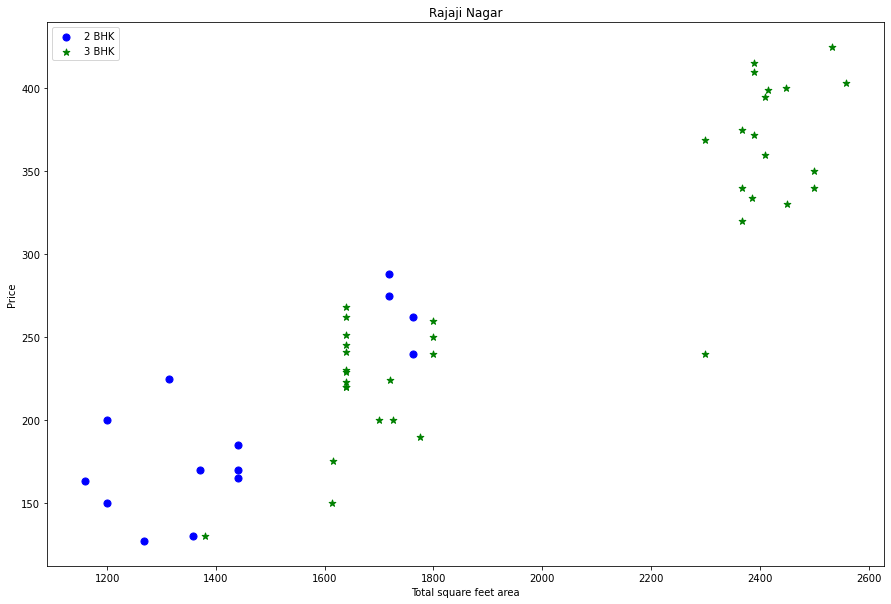

In [32]:
def scatter_plot_price(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue',label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', marker = '*',label = '3 BHK', s = 50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
scatter_plot_price(df7, "Rajaji Nagar")

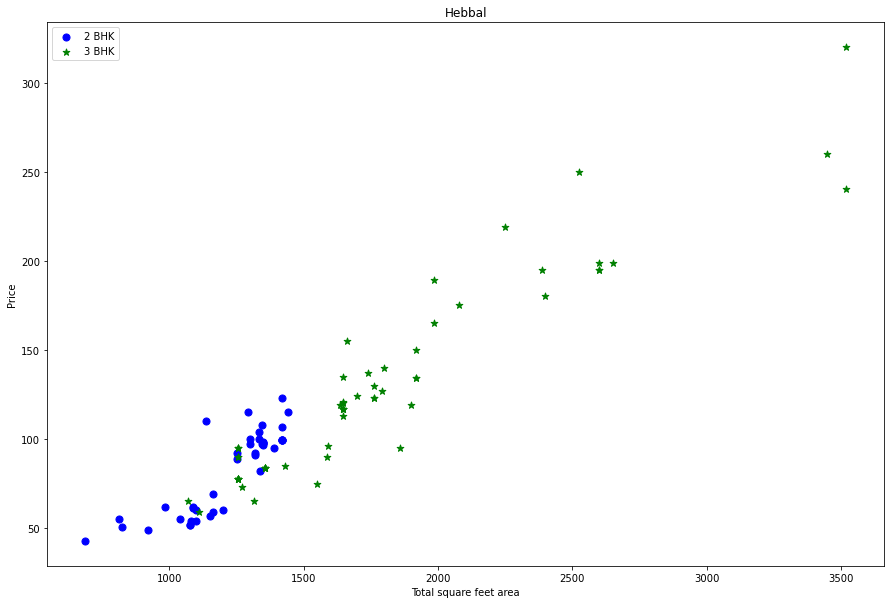

In [33]:
scatter_plot_price(df7,"Hebbal")

#### Ta thấy một số data point cùng location nhưng 2bhk lại có giá cao hơn 3 bhk nên phải loại bỏ chúng

In [34]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape    

(7329, 7)

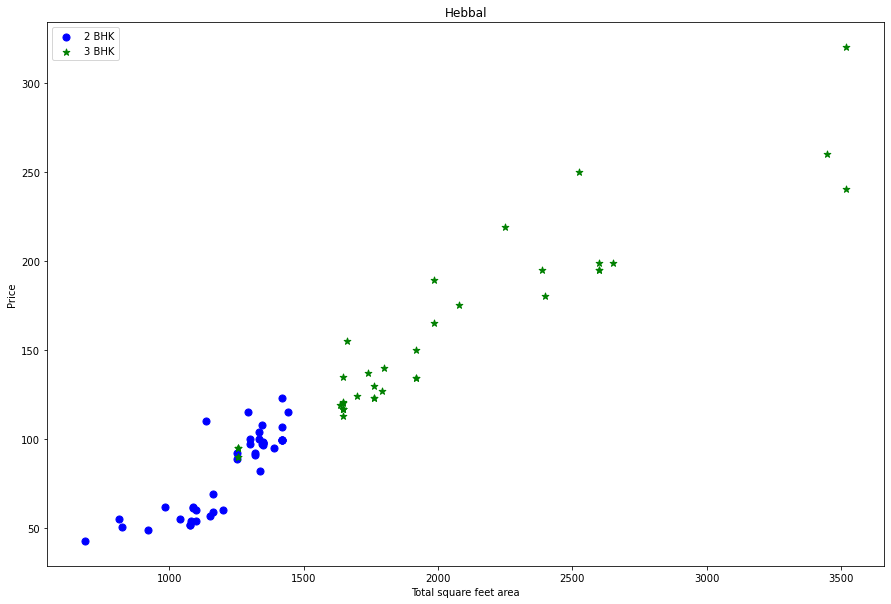

In [35]:
scatter_plot_price(df8,"Hebbal")

Text(0, 0.5, 'Count')

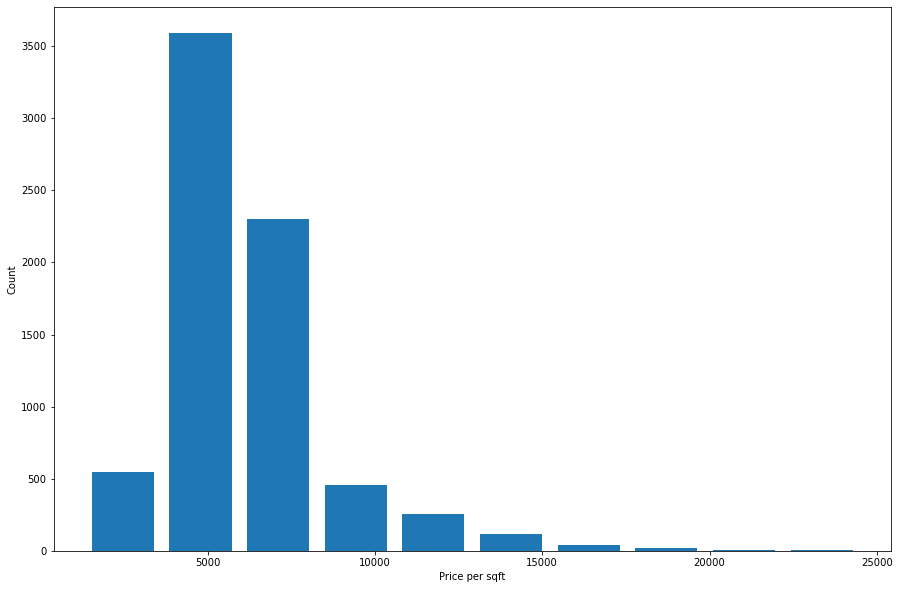

In [36]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df8.price_per_sqft, rwidth =0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

### Outlier removal using bathrooms feature

Text(0, 0.5, 'Count')

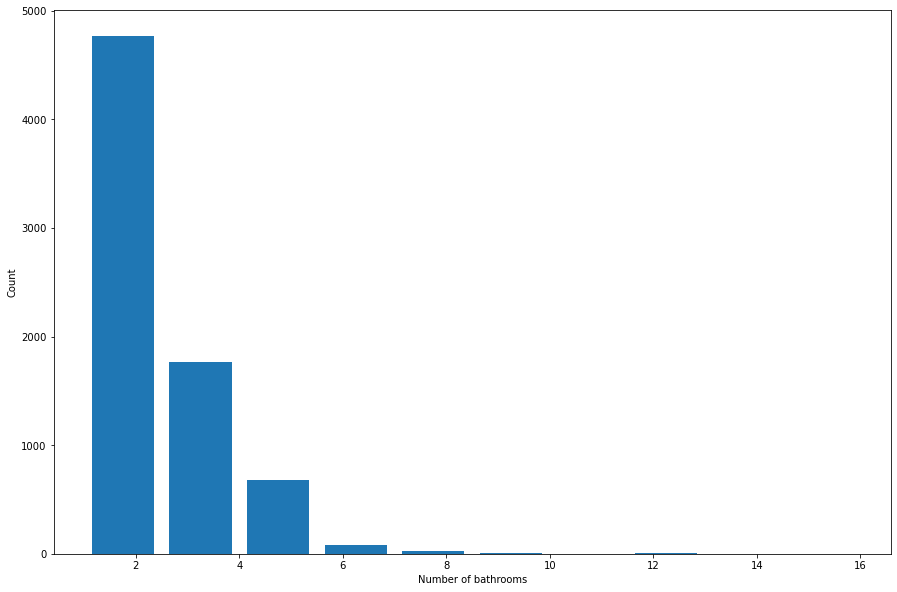

In [73]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [37]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


#### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [38]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [39]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [40]:
df9.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525


#### One Hot Encoding

In [41]:
loc_dummies = pd.get_dummies(df9.location)
loc_dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df10 = pd.concat([df9, loc_dummies.drop('other', axis='columns')], axis='columns')
df10.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df11 = df10.drop(['size', 'price_per_sqft', 'location'], axis='columns')
df11.head(10)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X = df11.drop('price', axis='columns')
y = df11.price

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True)

In [46]:
len(X_train)

5800

In [47]:
len(X_test)

1451

In [48]:
X_test

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
694,1260.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3248,1272.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2626,1243.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,1231.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3130,1880.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,1313.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1269,1075.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6355,1665.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9790,1626.6,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
lr.score(X_test, y_test)

0.8574435497650457

### Using K Fold

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

### Test model for few properties

In [69]:
def pridict_price(location, sqft, bath, bhk):
    test_array = np.zeros([df11.shape[1]-1])
    if location in X.columns:
        test_array[X.columns.get_loc(location)]=1
    else:
        print('Not found location')
    test_array[0] = sqft
    test_array[1] = bath
    test_array[2] = bhk
    score = lr.predict([test_array])
    return score

pridict_price('1st Phase JP Nagar',1000, 2, 2)

array([84.2302818])

### Find out best model for dataset using GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_gridCV(X,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'normalize':[True, False],
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic'],
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random'],
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size= 0.2, random_state = 10)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score= False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_param': gs.best_params_,
        })
    return scores

find_best_model_gridCV(X, y)

[{'model': 'linear_regression',
  'best_score': 0.8473750758555377,
  'best_param': {'normalize': True}},
 {'model': 'lasso',
  'best_score': 0.7129982770720018,
  'best_param': {'alpha': 1, 'selection': 'random'}},
 {'model': 'decision_tree',
  'best_score': 0.6462391884269071,
  'best_param': {'criterion': 'friedman_mse', 'splitter': 'best'}}]

### Save model with pickle

In [77]:
import pickle
with open('bangalura_house_price_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

### Export location and column information to a file that will be useful later on in our prediction application

In [81]:
import json
columns = {
    'columns_data': [col.lower() for col in X.columns]
}
with open('columns.json', "w") as f:
    f.write(json.dumps(columns))